In [1]:
# 네이버 뉴스 자율주행 크롤링

In [31]:
import requests
from pandas import DataFrame
from bs4 import BeautifulSoup
import re
from datetime import datetime
import os

In [32]:
date = str(datetime.now())
date = date[:date.rfind(':')].replace('','_')
date = date.replace(':','시') + '분'

In [33]:
# 인풋 생성
query = input('검색 키워드를 입력하세요 : ')
query = query.replace(' ', '+')

news_num = int(input('총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : '))

검색 키워드를 입력하세요 : 자율주행
총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : 100


In [24]:
# 키워드 = '자율주행'
# = f'https://m.search.naver.com/search.naver?where=m_news&sm=mtb_jum&query={키워드}'
# print(news_url)
#https://m.search.naver.com/search.naver?sm=mtp_hty.top&where=m&query=%EC%9E%90%EC%9C%A8%EC%A3%BC%ED%96%89


In [34]:
news_url = 'https://search.naver.com/search.naver?where=m_news&sm=mtb_jum&query={}'

req = requests.get(news_url.format(query)) # html 코드 받아오기 <Response [200]>
soup = BeautifulSoup(req.text, 'html.parser') # 받은 코드로 파싱 

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="자율주행 : 네이버 통합검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'자율주행'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'자율주행'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>자율주행 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220602.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sst
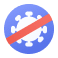
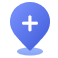
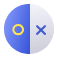
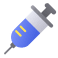

In [35]:
soup

In [36]:
# 원하는 정보를 담을 변수 생성(딕셔너리) : key 번호, value 뉴스기사정보
news_dict = {}
idx = 0 # 현재 뉴스 번호 
cur_page =1 # 네이버 뉴스 웹 페이지 

In [39]:
print()
print('크롤링 중...')

while idx < news_num:
### 네이버 뉴스 웹페이지 구성이 바뀌어 태그명, class 속성 값 등을 수정함(20210126) ###
    
    table = soup.find_all('ul',{'class' : 'list_news'})
    li_list = table.find_all('li', {'id': re.compile('sp_nws.*')})
    area_list = [li.find('div', {'class' : 'news_area'}) for li in li_list]
    a_list = [area.find('a', {'class' : 'news_tit'}) for area in area_list]
    
    for n in a_list[:min(len(a_list), news_num-idx)]:
        news_dict[idx] = {'title' : n.get('title'),
                          'url' : n.get('href') }
        idx += 1

    cur_page += 1
    
    pages = soup.find('div', {'class' : 'sc_page_inner'})
    next_page_url = [p for p in pages.find_all('a') if p.text == str(cur_page)][0].get('href')
    
    req = requests.get('https://search.naver.com/search.naver' + next_page_url)
    soup = BeautifulSoup(req.text, 'html.parser')


크롤링 중...
[<ul class="list_news"> <li class="bx" id="sp_nws_all1"> <div class="news_wrap api_ani_send"> <div class="news_area"> <div class="news_info"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-url="http://www.newsis.com/view/?id=NISX20220617_0001910903&amp;cID=10406&amp;pID=13100" href="#" onclick="tCR('a=nws_all*h.kep&amp;r=1&amp;i=88000127_000000000000000011252729&amp;u=javascript'); return false;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=nws_all*h.kepoff&amp;r=1&amp;i=88000127_000000000000000011252729&amp;u=javascript" data-cr-on="a=nws_all*h.kepon&amp;r=1&amp;i=88000127_000000000000000011252729&amp;u=javascript" href="#" role="button">Keep에 저장</a> <a class="spnew_af item item_quick" href="https://keep.naver.com/" onclick="return goOtherCR(this,'a=nws_all*h.kephome&amp;r=1&amp;i=88000127_00000000000000001125

AttributeError: ResultSet object has no attribute 'find_all'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [29]:
! pip install openpyxl

In [30]:
print('크롤링 완료')
print('데이터프레임 변환')
news_df = DataFrame(news_dict).T

folder_path = os.getcwd()
csv_file_name = '네이버뉴스_{}_{}.csv'.format(query, date)

news_df.to_csv(csv_file_name)

print('엑셀 저장 완료 | 경로 : {}\\{}'.format(folder_path, csv_file_name))




크롤링 완료
데이터프레임 변환
엑셀 저장 완료 | 경로 : /Users/minjaering/Desktop/2차project\네이버뉴스___2_0_2_2_-_0_6_-_1_7_ _1_7_시_0_5_분.csv
